In [1]:
import sys
import os
sys.path.append('../')

In [40]:
from nustar_scripts.nu_pyxspec import  Model, Fit, Plot, xspec, AllData, AllModels
from nustar_scripts.nu_utils import set_mpl, plt
from nustar_scripts.nu_class import NustarObservation
from nustar_scripts.pulsar_init import analysis_path, plot_path, ObsAlias
from cycler import cycler
%matplotlib inline
set_mpl('deep')

AllModels.lmod('relxill', '/Users/sdbykov/work/xray_pulsars/sj0243_nu/python_for_nustar/relxill_model/') #set path to relxill model


In [41]:
set_mpl('pastel')
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'g', 'g', 'b','b', 'violet', 'violet', 'brown', 'brown', 'pink', 'pink'])))
#plt.rc('axes', prop_cycle=(cycler('color', ['violet', 'violet', 'brown', 'brown', 'pink', 'pink'])))

# Ratio to  cutoffpl

In [63]:

def plot_po_rat(
    ObsID,
    gamma = '2',
    ecut = '40',
    ax = None,):

    ms, alpha, lw = 5, 0.3, 0
    min_sig = 400,
    if ax is None:
        fig,  ax =  plt.subplots( figsize = (8, 3))
    else:
        fig = None
        pass

    os.chdir(f"{analysis_path}out{ObsID}/products/spe_and_lc")
    xspec.AllData.clear()
    xspec.AllModels.clear()
    xspec.Xset.restore(f'./xspec/relxilllp/xcm/{ObsID}_relxilllp.xcm_data')
    mo_cutoffpl = Model("const*cutoffpl")
    mo_cutoffpl.cutoffpl.PhoIndex = str(gamma) + ' -1'
    mo_cutoffpl.cutoffpl.HighECut = str(ecut) + ' -1'

    mo_cutoffpl.setPars({1: '1. -1'})
    m2 = AllModels(2)
    m2.setPars({1: '1. '})
    Fit.query = 'yes'
    Fit.statMethod = "chi"
    Fit.query = "yes"
    Fit.perform()

    label = f'{ObsAlias[ObsID]}'

    for gr, m, l in zip([1,2], ['o', 's'], [label, '_'+ label]):

        Plot.device = "/null"
        Plot.setRebin(min_sig, min_sig)
        Plot("rat")
        Plot.xAxis = "keV"
        en = np.array(Plot.x(gr))
        data = np.array(Plot.y(gr))
        en_err = np.array(Plot.xErr(gr))
        data_err = np.array(Plot.yErr(gr))


        ax.semilogx(en, data, marker = m, lw = lw, alpha = alpha, ms = ms, label  =l)   
        color =  ax.get_lines()[-1].get_color()         
        ax.errorbar(en, data, data_err, en_err,
                        fmt='none', ecolor=color, alpha=alpha,)
        #data_interp = scipy.interpolate.CubicSpline(en, data)
        #en_axis = np.geomspace(en[0], en[-1], 250)
        #ax.plot(en_axis, data_interp(en_axis), '-', color = color, lw = 3, alpha = 0.6)

    ax.set_xscale("log")
    #ax_rat.set_yscale("log")
    #ax.axvline(6.4, color="k", ls="--", lw=0.5)
    ax.set_xlabel("Energy (keV)")

    #ax.set_ylabel(f"Ratio to cutoffpl,\n $\Gamma$={gamma}; $E_{{cut}}$={ecut} keV", fontsize = 14)
    ax.set_ylabel(f"Ratio to cutoffpl", fontsize = 14)
    ax.legend()
    #l = ax.legend(loc="lower left", title = ObsAlias[ObsID], fontsize = 10,  title_fontsize = 10)
    #l.set_zorder(-1)
    #for lh in l.legendHandles:
    #    lh.set_alpha(1)
    # ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', fontsize=8)
    ax.set_xticks([4, 6, 7, 10, 20, 40, 80])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())



    return fig, ax



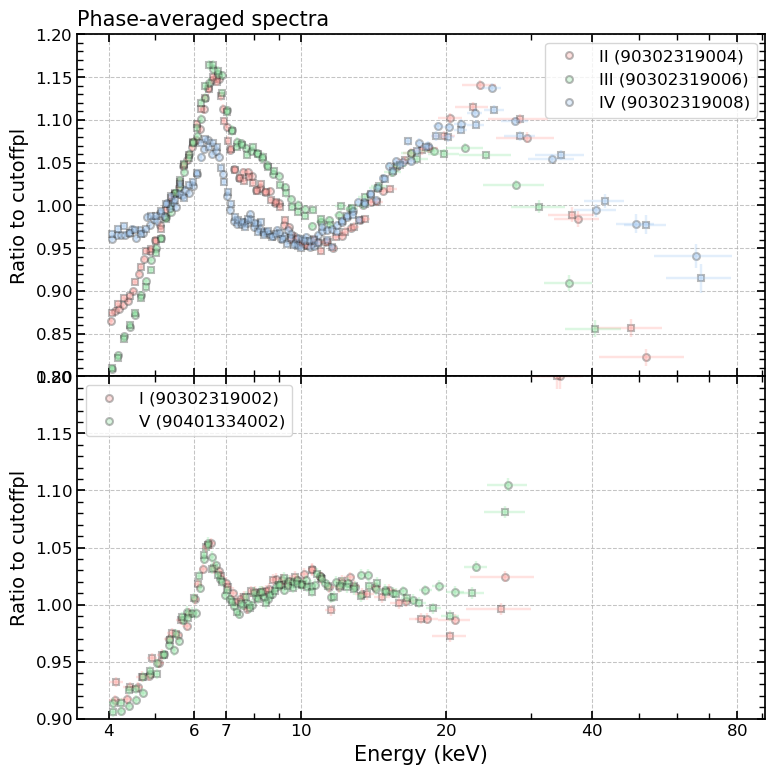

In [64]:
fig,  [ax1, ax2] =  plt.subplots(2, figsize = (8,8), sharex=True, gridspec_kw = {'hspace':0})
plot_po_rat('90302319004', ecut = '60', ax = ax1)
plot_po_rat('90302319006', ecut = '60', ax = ax1)
plot_po_rat('90302319008', ecut = '25', gamma = '1.2', ax = ax1)

plot_po_rat('90302319002', ecut = '11', gamma = '0.6', ax = ax2)
plot_po_rat('90401334002', ecut = '11', gamma = '0.6', ax = ax2)
ax1.set_ylabel(f"Ratio to cutoffpl", fontsize = 14)
ax2.set_ylim(0.9,1.2)
ax1.set_ylim(0.8,1.2)
ax1.set_title('Phase-averaged spectra')
fig.tight_layout()
fig.savefig(plot_path+ '/ph-ave/cutoffpl_ratio_ph_ave.pdf')